##**Task 1 IRIS FLOWER CLASSIFICATION**

##**Importing Libraries**

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

##**Loading Dataset**

In [113]:
df=pd.read_csv("/content/IRIS.csv")

In [114]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##**Exploring Dataset**

In [115]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
type(df)

pandas.core.frame.DataFrame

In [117]:
#Dataset Rows and Columns Count
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  150
Number of columns:  5


In [118]:
  df.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [120]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [121]:
dup=df.duplicated().sum()
print("Number of duplicated rows are",dup)

Number of duplicated rows are 3


In [122]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [123]:
#check for unique values
for i in df.columns.tolist():
  print("Number of unique values in",i,"is",df[i].nunique())

Number of unique values in sepal_length is 35
Number of unique values in sepal_width is 23
Number of unique values in petal_length is 43
Number of unique values in petal_width is 22
Number of unique values in species is 3


##**Visualizing the Dataset**

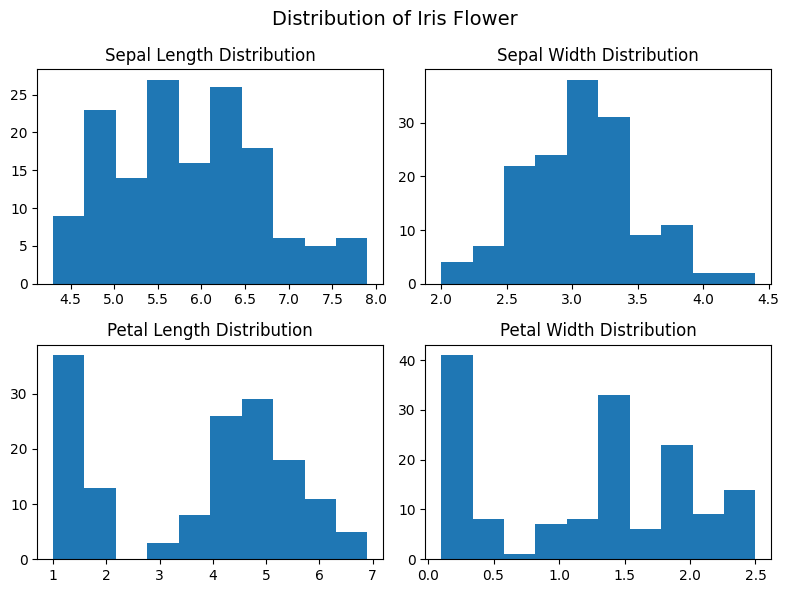

In [124]:
plt.figure(figsize=(8,6))
plt.suptitle("Distribution of Iris Flower",fontsize=14)

plt.subplot(2,2,1)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2,2,2)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2,2,3)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2,2,4)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

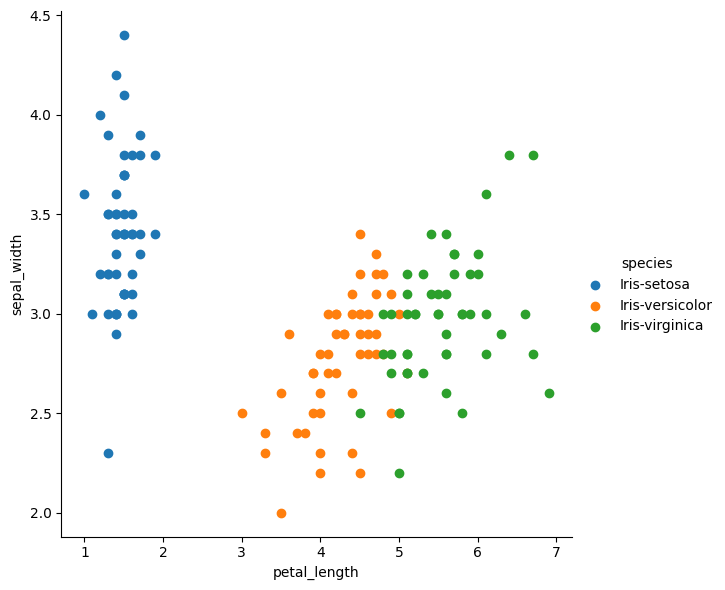

In [125]:
sns.FacetGrid(df,hue="species",height=6).map(plt.scatter,"petal_length","sepal_width").add_legend()

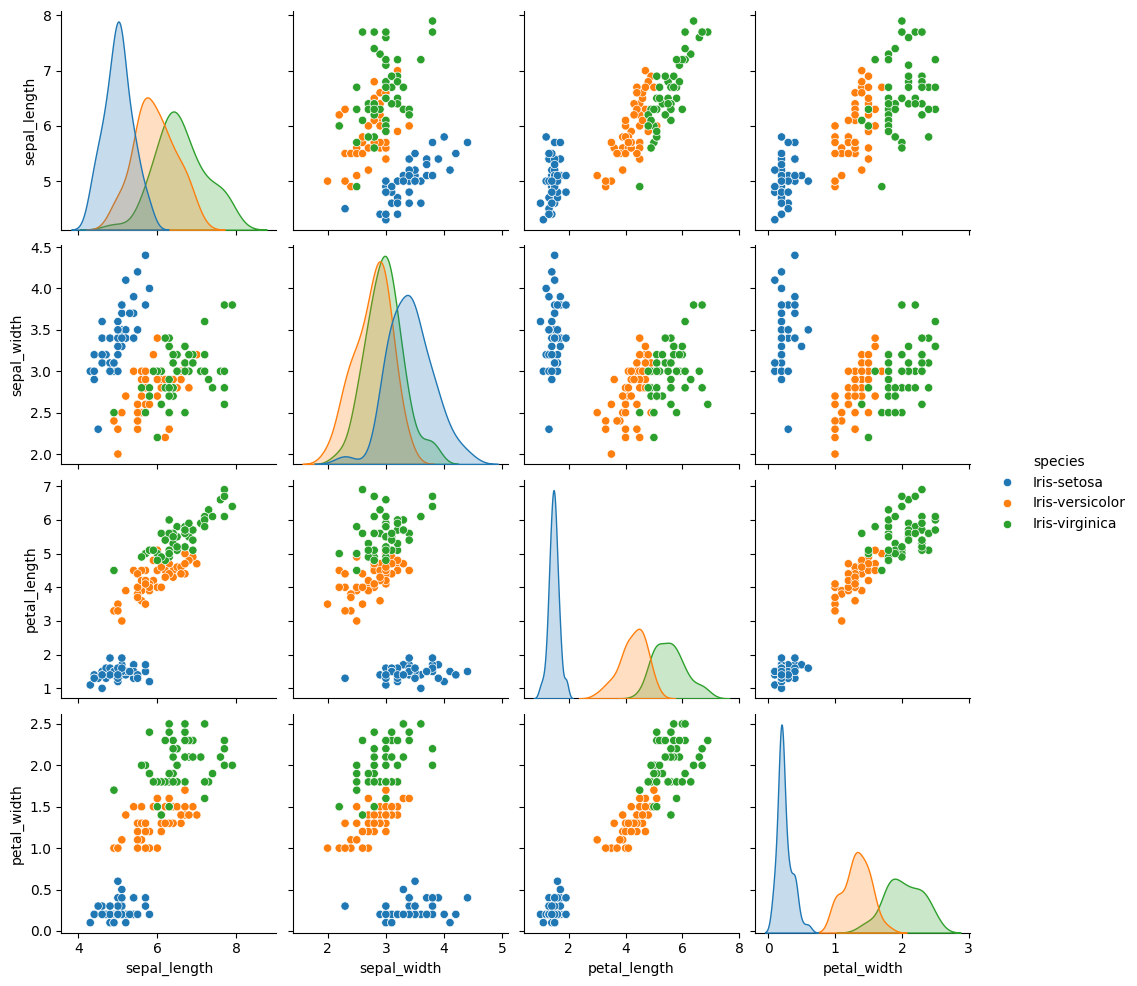

In [126]:
sns.pairplot(df,hue="species")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

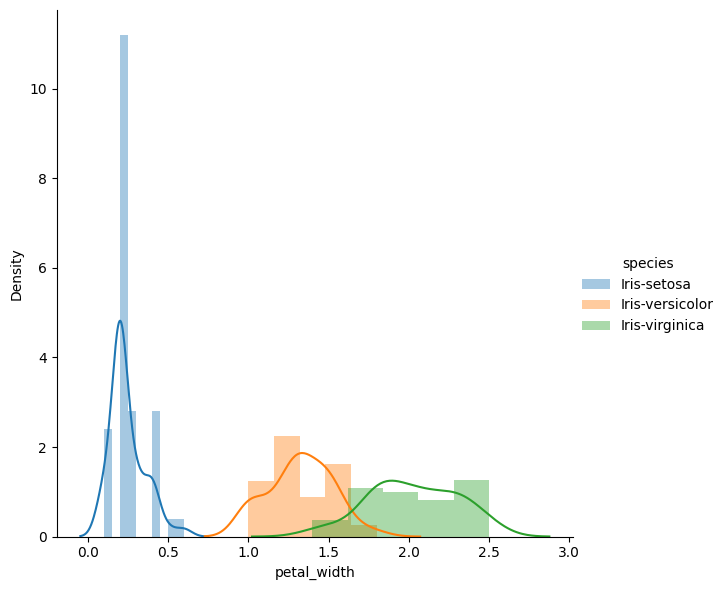

In [127]:
sns.FacetGrid(df,hue="species",height=6).map(sns.distplot,"petal_width").add_legend();

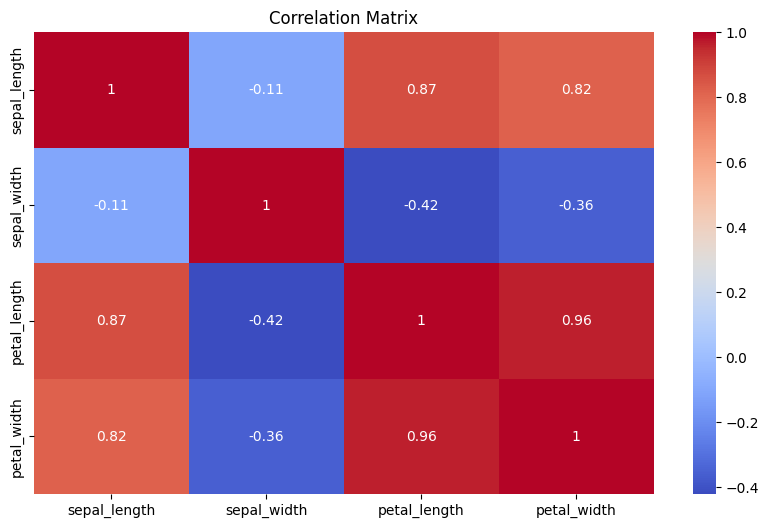

In [128]:
 # Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
numeric_df = df.drop("species", axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

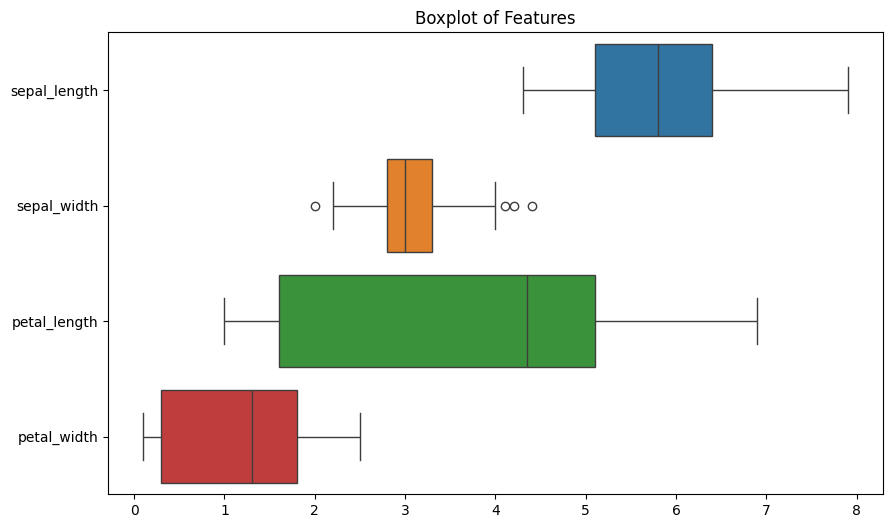

In [129]:
# Boxplot to check the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df, orient="h")
plt.title('Boxplot of Features')
plt.show()

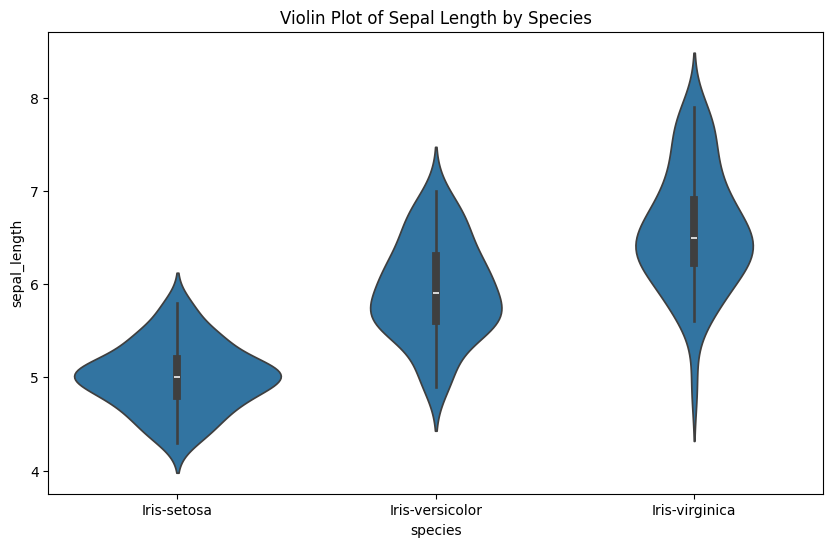

In [130]:
# Violin Plot to visualize the distribution of data across different categories
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="sepal_length", data=df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

3D Scatter Plot

In [131]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

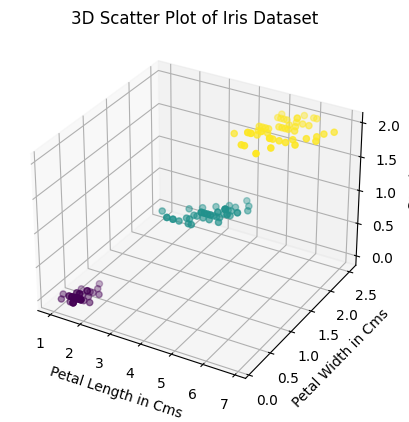

In [132]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['petal_length'], df['petal_width'], df['species_encoded'], c=df['species_encoded'], cmap='viridis')
ax.set_xlabel('Petal Length in Cms')
ax.set_ylabel('Petal Width in Cms')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot of Iris Dataset')
plt.show()

##**Preprocessing Data**

In [133]:
X = df.drop("species",axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [134]:
y = df["species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [136]:
X_train

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
81,5.5,2.4,3.7,1.0,1
133,6.3,2.8,5.1,1.5,2
137,6.4,3.1,5.5,1.8,2
75,6.6,3.0,4.4,1.4,1
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1
106,4.9,2.5,4.5,1.7,2
14,5.8,4.0,1.2,0.2,0
92,5.8,2.6,4.0,1.2,1


##**Training the Model**

  - Using KNN

In [137]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##**Making Prediction**

In [138]:
y_pred = knn.predict(X_test)

##**Evaluating the Model**

In [139]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  1.0


In [140]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [141]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [142]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


##**Predicting for New Data Points**

In [143]:
new_data1 = pd.DataFrame({
    "sepal_length": [5.1],
    "sepal_width": [3.5],
    "petal_length": [1.4],
    "petal_width": [0.2],
    "species_encoded": [0]
})

In [144]:
prediction = knn.predict(new_data1)
print("Prediction for new data 1: ",prediction[0])

Prediction for new data 1:  Iris-setosa


In [145]:
new_data2 = pd.DataFrame({
    "sepal_length": [6.5],
    "sepal_width": [6.5],
    "petal_length": [3.4],
    "petal_width": [2.9],
    "species_encoded": [0]
})

In [146]:
prediction = knn.predict(new_data2)
print("Prediction for new data 2: ",prediction[0])

Prediction for new data 2:  Iris-versicolor
